# Imports

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

from src.preparation.data_access.obtained_text_da import ObtainedTextDA

%matplotlib inline

/home/hans/Documentos/Tesis_Chatbot/.env/lib/python3.8/site-packages/sqlalchemy/orm/util.py:104: SAWarning: The 'delete-orphan' cascade option requires 'delete'.
  util.warn(


# Data obtaining

In [2]:
texts = ObtainedTextDA().select_all_as_dataframe().drop(columns=['cluster_grade'])
texts

,CNCADC,CNCAdd,CNCAll,CNCCaus,CNCLogic,CNCTemp,CRFANP1,CRFANPa,CRFAO1,CRFAOa,...,WRDPRP1s,WRDPRP2p,WRDPRP2s,WRDPRP3p,WRDPRP3s,WRDVERB,category,filename,grade,id
0,3.197442,1.065814,50.892619,15.454303,30.109246,1.065814,0.099526,0.079630,0.236967,0.148887,...,0.000000,0.000000,0.000000,2.398082,10.125233,110.578204,"Historia, Geografía y Economía",atahualpa.txt,1.0,1.0
1,2.828854,0.848656,49.504950,11.598303,33.663366,0.565771,0.159722,0.119540,0.291667,0.197797,...,0.565771,0.000000,0.848656,2.545969,8.769448,94.766620,"Historia, Geografía y Economía",avelino_caceres.txt,1.0,2.0
2,3.475239,1.737619,58.210252,11.294526,40.834057,0.868810,0.026316,0.019822,0.197368,0.150034,...,0.000000,0.000000,5.212858,1.737619,9.556907,149.435274,"Historia, Geografía y Economía",cartilla_fenomeno_nino.txt,1.0,3.0
3,3.530450,2.647838,63.548102,10.591350,44.130627,2.647838,0.035714,0.039216,0.166667,0.142577,...,0.000000,0.000000,9.708738,0.000000,9.708738,151.809356,"Historia, Geografía y Economía",cartilla_inundaciones.txt,1.0,4.0
4,3.479990,2.485707,49.714144,13.174248,30.325628,0.248571,0.151515,0.171011,0.430303,0.273384,...,0.000000,0.000000,0.000000,1.739995,10.688541,93.711161,"Historia, Geografía y Economía",enrique_meiggs.txt,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,4.867470,2.698795,46.843373,13.156627,24.626506,1.493976,0.153777,0.113482,0.229317,0.130330,...,12.144578,2.650602,15.180723,2.409639,20.192771,118.265060,Comunicación,seis_personajes_busca.txt,2.0,181.0
181,3.265306,0.608534,44.452690,13.595547,25.751391,1.231911,0.072211,0.051115,0.170490,0.105130,...,10.241187,0.044527,2.077922,1.128015,9.261596,108.897959,Comunicación,viaje_centro_tierra.txt,2.0,182.0
182,2.149349,0.890445,60.447883,15.413903,40.274707,1.719479,0.328918,0.254774,0.546726,0.382347,...,20.848686,0.194465,0.020470,3.531073,13.745599,114.120200,Comunicación,viajes_gulliver.txt,2.0,183.0
183,1.135222,0.873248,73.876785,18.731171,52.045584,1.091560,0.287313,0.192939,0.375622,0.225790,...,22.879099,0.480286,2.357770,2.969043,22.922761,102.606645,Comunicación,vida_lazarillo_tormes.txt,2.0,184.0


# EDA

## Null checking

In [3]:
texts.isna().sum()

CNCADC      1
CNCAdd      1
CNCAll      1
CNCCaus     1
CNCLogic    1
CNCTemp     1
CRFANP1     1
CRFANPa     1
CRFAO1      1
CRFAOa      1
CRFCWO1     1
CRFCWO1d    1
CRFCWOa     1
CRFCWOad    1
CRFNO1      1
CRFNOa      1
CRFSO1      1
CRFSOa      1
DESPC       0
DESPL       0
DESPLd      0
DESSC       0
DESSL       0
DESSLd      0
DESWC       0
DESWLlt     1
DESWLltd    1
DESWLsy     1
DESWLsyd    1
DRNEG       1
DRNP        1
DRVP        1
LDTTRa      1
LDTTRcw     1
RDFHGL      1
SYNLE       1
SYNNP       1
WRDADJ      1
WRDADV      1
WRDNOUN     1
WRDPRO      1
WRDPRP1p    1
WRDPRP1s    1
WRDPRP2p    1
WRDPRP2s    1
WRDPRP3p    1
WRDPRP3s    1
WRDVERB     1
category    0
filename    0
grade       0
id          0
dtype: int64

We can see that is one document that couldn't be analyzed correctly by the text complexity analyzer library. This happened because of problems with the files. Those records won't be used.

In [4]:
texts.dropna(inplace=True)
texts.isna().sum()

CNCADC      0
CNCAdd      0
CNCAll      0
CNCCaus     0
CNCLogic    0
CNCTemp     0
CRFANP1     0
CRFANPa     0
CRFAO1      0
CRFAOa      0
CRFCWO1     0
CRFCWO1d    0
CRFCWOa     0
CRFCWOad    0
CRFNO1      0
CRFNOa      0
CRFSO1      0
CRFSOa      0
DESPC       0
DESPL       0
DESPLd      0
DESSC       0
DESSL       0
DESSLd      0
DESWC       0
DESWLlt     0
DESWLltd    0
DESWLsy     0
DESWLsyd    0
DRNEG       0
DRNP        0
DRVP        0
LDTTRa      0
LDTTRcw     0
RDFHGL      0
SYNLE       0
SYNNP       0
WRDADJ      0
WRDADV      0
WRDNOUN     0
WRDPRO      0
WRDPRP1p    0
WRDPRP1s    0
WRDPRP2p    0
WRDPRP2s    0
WRDPRP3p    0
WRDPRP3s    0
WRDVERB     0
category    0
filename    0
grade       0
id          0
dtype: int64

## Visualizing the original grades

### Grades per category

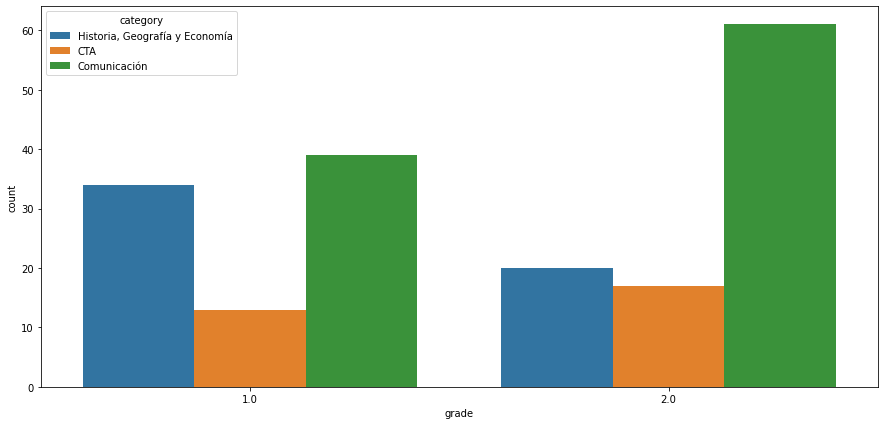

In [5]:
fig, ax = plt.subplots(figsize=(15, 7))
ax = sns.countplot(x="grade", hue='category', data=texts, ax=ax)

### Total grades

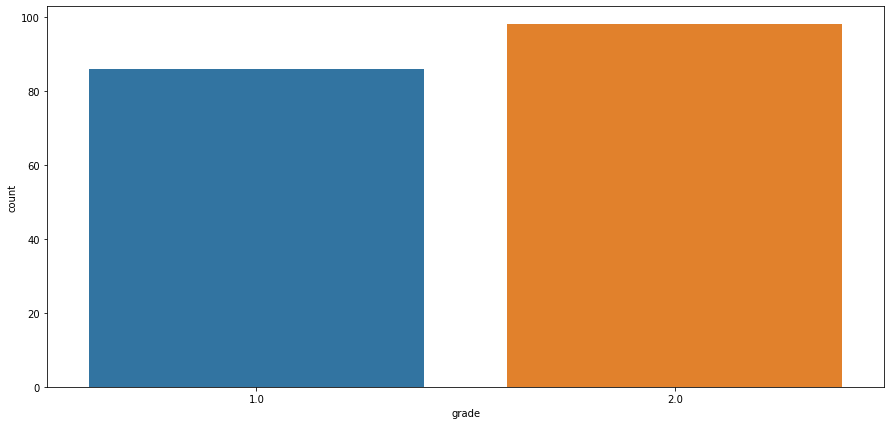

In [6]:
fig, ax = plt.subplots(figsize=(15, 7))
ax = sns.countplot(x="grade", data=texts, ax=ax)